<a href="https://colab.research.google.com/github/OmarovaJuma/AI.MO/blob/main/Lr10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Выполнила работу Омарова Джума группа ПИН-б-о-22-1**

# **Лабораторная работа 10. Полиномиальная регрессия**


# **Первичный анализ**

Описание данных:

credit.policy: Этот признак имеет значение 1, если клиент соответствует кредитным критериям LendingClub.com, и 0 в противном случае.

purpose: Это цель кредита, принимающая значения "credit_card" (кредитная карта), "debt_consolidation" (консолидация долга), "educational" (образовательный), "major_purchase" (крупная покупка), "small_business" (малый бизнес) и "all_other" (все прочее).

int.rate: Это процентная ставка по кредиту в виде десятичной дроби.
installment: Ежемесячные платежи, которые должен выплачивать заемщик, если кредит одобрен.

log.annual.inc: Натуральный логарифм самозаявленного годового дохода заемщика.

dti: Долг к годовому доходу, представленный как отношение.
fico: Кредитный рейтинг FICO заемщика.

days.with.cr.line: Количество дней, в течение которых у заемщика была кредитная линия.

revol.bal: Оборотный баланс заемщика (сумма, не оплаченная к концу кредитного цикла по кредитной карте).

revol.util: Коэффициент использования оборотной линии заемщика (отношение использованной суммы к общей доступной сумме кредита).

inq.last.6mths: Количество запросов заемщика кредиторами за последние 6 месяцев.

delinq.2yrs: Количество раз, когда заемщик был задолженным на 30+ дней за последние 2 года.

pub.rec: Количество неблагоприятных публичных записей заемщика (банкротство, налоговые обременения или судебные постановления).

not.fully.paid: Целевая переменная, принимающая значение 1, если заемщик не полностью погасил кредит, и 0 в противном случае.

Характеристики данных:

Количество элементов в наборе данных: 9578

Количество признаков: 14

Количество пропущенных значений: Отсутствуют

Графическое представление данных:

Для анализа распределения признаков, их взаимосвязей и выбросов или аномалий можно построить различные виды графиков, такие как гистограммы, диаграммы рассеяния и ящики с усами.

Статистические показатели:

In [ ]:
# Рассчитать статистические показатели
stats = dataset.describe()

# Вывести статистические показатели
print(stats)

       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.0000

Импортируются необходимые библиотеки:

numpy для работы с массивами и матрицами чисел

pandas для работы с данными в виде таблиц

из sklearn.model_selection импортируется функция train_test_split для разделения данных на обучающий и тестовый наборы

из sklearn.preprocessing импортируются классы LabelEncoder, OneHotEncoder и StandardScaler для предобработки данных

из sklearn.compose импортируется класс ColumnTransformer для комбинирования преобразований различных признаков

из sklearn.linear_model импортируется класс LinearRegression для построения линейной регрессии

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Загрузка и предобработка данных из файла 'loan_data.csv' с использованием функционала библиотек numpy и pandas.

In [ ]:
dataset = pd.read_csv('/content/dataset/loan_data.csv')
dataset

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


X = dataset.iloc[:, :-1].values - Этот код извлекает матрицу признаков X из загруженного набора данных dataset. Он использует метод iloc для доступа к данным по индексам. Здесь [:, :-1] означает, что мы выбираем все строки и все столбцы, кроме последнего, так как предполагается, что последний столбец содержит зависимую переменную или целевую переменную. .values преобразует выбранные данные в массив numpy для дальнейшей обработки.

y = dataset.iloc[:, -1].values - Этот код извлекает зависимую переменную y из набора данных dataset. Он выбирает все строки и только последний столбец с помощью [:, -1], предполагая, что последний столбец содержит зависимую переменную. Как и в предыдущем случае, .values преобразует данные в массив numpy.

print("Матрица признаков"); print(X) - Этот код выводит на экран матрицу признаков X, чтобы пользователь мог ознакомиться с данными, с которыми работает алгоритм.

print("Зависимая переменная"); print(y) - Этот код выводит на экран зависимую переменную y, также с целью ознакомления пользователя с этими данными.

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("Матрица признаков"); print(X)
print("Зависимая переменная"); print(y)

Матрица признаков
[[1 'debt_consolidation' 0.1189 ... 0 0 0]
 [1 'credit_card' 0.1071 ... 0 0 0]
 [1 'debt_consolidation' 0.1357 ... 1 0 0]
 ...
 [0 'debt_consolidation' 0.1071 ... 8 0 0]
 [0 'home_improvement' 0.16 ... 5 0 0]
 [0 'debt_consolidation' 0.1392 ... 6 0 0]]
Зависимая переменная
[0 0 0 ... 1 1 1]


dataset.isnull() - Этот метод проверяет каждое значение в наборе данных (dataset) на наличие пропущенных значений. Если значение пропущено, возвращается True, в противном случае - False.

.sum() - После применения isnull(), этот метод суммирует количество пропущенных значений в каждом столбце.

print() - Эта функция выводит результат на экран.

In [ ]:
# Обработка пропущенных значений
# Проверим, есть ли пропущенные значения в данных
print(dataset.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


labelencoder_y = LabelEncoder() - Эта строка создает экземпляр класса LabelEncoder из библиотеки scikit-learn. LabelEncoder используется для преобразования категориальных (неструктурных) данных в числовые значения, которые могут быть использованы алгоритмами машинного обучения.

print('Зависимая переменная до обработки') и print(y) - Эти строки выводят на экран исходную зависимую переменную y до её обработки, чтобы пользователь мог ознакомиться с данными.

y = labelencoder_y.fit_transform(y) - Этот вызов метода fit_transform() применяет кодирование категорий к зависимой переменной y. Метод fit_transform() сначала "обучает" кодировщик на уникальных значениях в y с помощью метода fit(), а затем преобразует их в числовые метки с помощью метода transform(). Результат сохраняется в переменной y.

print('Зависимая переменная после обработки') и print(y) - Эти строки выводят на экран обработанную зависимую переменную y после её преобразования, чтобы пользователь мог убедиться, что процесс выполнен корректно.

In [ ]:
labelencoder_y = LabelEncoder()
print('Зависимая переменная до обработки')
print(y)
y = labelencoder_y.fit_transform(y)
print('Зависимая переменная после обрабокти')
print(y)

Зависимая переменная до обработки
[0 0 0 ... 1 1 1]
Зависимая переменная после обрабокти
[0 0 0 ... 1 1 1]


ColumnTransformer - Этот класс из библиотеки scikit-learn позволяет применять различные преобразования к различным столбцам или подмножествам столбцов данных.

('one_hot_encoder', OneHotEncoder(), [1]) - Этот кортеж определяет преобразование для столбца данных. Здесь используется метод One-Hot Encoding (OneHotEncoder()), который преобразует категориальные переменные в бинарные векторы. [1] указывает индекс столбца или столбцов, которые требуется закодировать.

remainder='passthrough' - Этот параметр указывает, что все остальные столбцы данных должны оставаться без изменений (в данном случае, остальные столбцы после One-Hot Encoding останутся неизменными).

X = ct.fit_transform(X) - Этот вызов метода fit_transform() применяет преобразование, описанное в ColumnTransformer, к исходным данным X.

X = X[:, 1:] - Эта строка удаляет первый столбец после One-Hot Encoding. Это делается для избежания "ловушки фиктивных переменных" (Dummy Variable Trap), где один столбец можно предсказать на основе остальных.

print("One-hot encoded функция:") и print(X) - Эти строки выводят на экран One-Hot Encoded признаки после преобразования.

In [ ]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)
X = X[:, 1:]
print("One-hot encoded функция:")
print(X)

One-hot encoded функция:
[[0.0 1.0 0.0 ... 0 0 0]
 [1.0 0.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 1 0 0]
 ...
 [0.0 1.0 0.0 ... 8 0 0]
 [0.0 0.0 0.0 ... 5 0 0]
 [0.0 1.0 0.0 ... 6 0 0]]


Код выполняет разделение данных на обучающий и тестовый наборы для обучения модели машинного обучения и её последующей оценки.

X и y: X представляет собой матрицу признаков, а y - вектор целевых переменных. Эти данные используются для обучения модели, где X содержит признаки, а y - соответствующие значения, которые мы пытаемся предсказать с использованием модели.

test_size=0.2: Этот аргумент указывает размер тестового набора данных. Здесь он равен 0.2, что означает, что 20% данных будут отложены для тестирования, а остальные 80% будут использоваться для обучения модели.

random_state=0: Этот параметр обеспечивает воспроизводимость разделения данных. Если указано конкретное значение (например, 0), то при каждом запуске кода разделение будет происходить одинаковым образом. Это полезно для того, чтобы результаты были воспроизводимыми и не менялись при повторных запусках кода.

X_train, X_test, y_train, y_test: После выполнения кода, данные будут разделены на четыре части:

X_train: Обучающий набор признаков, который будет использоваться для обучения модели.

X_test: Тестовый набор признаков, который будет использоваться для оценки производительности обученной модели.

y_train: Значения целевой переменной, соответствующие обучающему набору данных.

y_test: Значения целевой переменной, соответствующие тестовому набору данных.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

polynomial_features = PolynomialFeatures(degree=degree): Здесь создается объект PolynomialFeatures из библиотеки scikit-learn с указанной степенью полинома.

X_train_poly = polynomial_features.fit_transform(X_train): Этот шаг преобразует обучающие данные X_train в полиномиальные признаки указанной степени с помощью метода fit_transform() объекта PolynomialFeatures.

X_test_poly = polynomial_features.transform(X_test): Аналогично, тестовые данные X_test также преобразуются в полиномиальные признаки, но уже с использованием метода transform(), так как параметры преобразования уже были выучены на обучающем наборе.

lin_reg = LinearRegression(): Создается объект линейной регрессии.

lin_reg.fit(X_train_poly, y_train): Модель линейной регрессии обучается на обучающем наборе данных, представленном в виде полиномиальных признаков.

y_pred = lin_reg.predict(X_test_poly): Для тестового набора данных делается прогноз с помощью обученной модели.

mse = mean_squared_error(y_test, y_pred): Вычисляется среднеквадратичная ошибка между фактическими значениями y_test и предсказанными значениями y_pred.

return mse: Функция возвращает среднеквадратичную ошибку на тестовом наборе данных.

In [ ]:
def train_polynomial_regression(degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    y_pred = lin_reg.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    return mse

Создаем степени полинома для анализа

In [ ]:
degrees = [1, 2, 3, 4, 5]

Сначала создается пустой список mse_values, в который будут добавляться значения среднеквадратичной ошибки (MSE) для каждой степени полинома.

Затем происходит итерация по каждой степени полинома из списка degrees.

На каждой итерации модель полиномиальной регрессии обучается с использованием функции train_polynomial_regression(degree), которая возвращает MSE для данной степени полинома.

Полученное значение MSE добавляется в список mse_values.

Выводится сообщение, содержащее степень полинома и соответствующее ей значение MSE.

In [ ]:
mse_values = []
for degree in degrees:
    mse = train_polynomial_regression(degree)
    mse_values.append(mse)
    print(f"Степень полинома {degree}, MSE: {mse}")

Степень полинома 1, MSE: 0.12511108933946669
Степень полинома 2, MSE: 0.12750957338879226
Степень полинома 3, MSE: 0.1783532893909408
Степень полинома 4, MSE: 1.0475821902589781
Степень полинома 5, MSE: 17.974056656895698


Выполняет оценку производительности модели полиномиальной регрессии для разных степеней полинома на тестовом наборе данных и визуализирует зависимость среднеквадратичной ошибки (MSE) от степени полинома.

Первый блок кода определяет список degrees, содержащий степени полиномов, которые будут рассмотрены при обучении моделей.

Затем в цикле for происходит итерация по каждой степени полинома из списка degrees. На каждой итерации модель полиномиальной регрессии обучается с использованием функции train_polynomial_regression(degree), которая возвращает значение MSE для данной степени полинома. Полученное значение MSE добавляется в список mse_values, а затем выводится сообщение, содержащее степень полинома и соответствующее ей значение MSE.

После завершения итераций выполняется визуализация результатов с помощью библиотеки Matplotlib. Создается график, на котором по оси x отображаются степени полинома, а по оси y - значения MSE. Точки на графике показывают зависимость MSE от степени полинома.

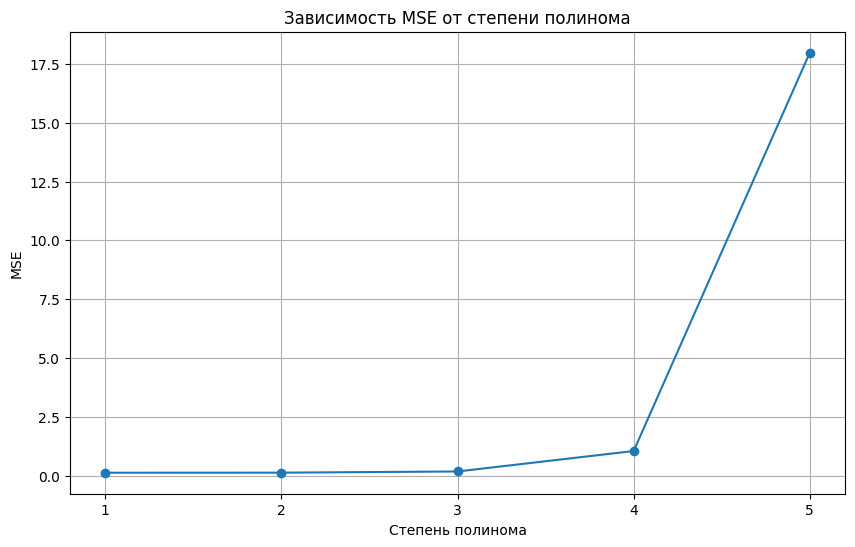

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, marker='o')
plt.title('Зависимость MSE от степени полинома')
plt.xlabel('Степень полинома')
plt.ylabel('MSE')
plt.xticks(degrees)
plt.grid(True)
plt.show()

# **Вывод**

Предварительная обработка данных: Мы начали с загрузки данных из файла CSV и разделили их на матрицу признаков (X) и зависимую переменную (y). Затем мы проверили данные на наличие пропущенных значений и использовали кодирование меток для преобразования категориальных переменных в числовые.

Обучение модели: Для обучения модели полиномиальной регрессии мы использовали библиотеку scikit-learn. Мы преобразовали признаки в полиномиальные при помощи PolynomialFeatures, после чего обучили линейную регрессию на преобразованных данных.

Оценка производительности модели: Для оценки производительности модели мы вычислили среднеквадратичную ошибку (MSE) для каждой степени полинома в цикле, перебирая различные степени. Это помогло нам определить, как степень полинома влияет на точность модели.

Визуализация результатов: Мы визуализировали зависимость MSE от степени полинома с помощью графика, где каждая точка на графике представляет собой соответствующую степень полинома и соответствующее значение MSE. Это позволило нам наглядно оценить, как изменяется производительность модели в зависимости от выбранной степени полинома.





### 1. Что такое проклятие размерности?

**Проклятие размерности** — это явление, при котором увеличение числа признаков (размерности) в данных приводит к ухудшению производительности алгоритмов машинного обучения. С увеличением размерности данные становятся разреженными, что затрудняет выявление закономерностей и увеличивает вычислительные затраты. Это также может привести к переобучению моделей, так как они начинают подстраиваться под шум в данных, а не под истинные зависимости.

### 2. Перечислите основные алгоритмы понижения размерности.

Некоторые из основных алгоритмов понижения размерности включают:

- **Метод главных компонент (PCA)**: Находит линейные комбинации признаков, которые максимизируют вариацию данных.
- **t-SNE (t-distributed Stochastic Neighbor Embedding)**: Уменьшает размерность, сохраняя локальные структуры данных.
- **UMAP (Uniform Manifold Approximation and Projection)**: Алгоритм, который сохраняет как локальную, так и глобальную структуру данных.
- **LDA (Linear Discriminant Analysis)**: Используется для классификации и уменьшения размерности, оптимизируя разделение классов.
- **Autoencoders**: Нейронные сети, которые учатся кодировать входные данные в меньшую размерность.

### 3. Опишите алгоритм и основную идею метода PCA.

**Метод главных компонент (PCA)** работает следующим образом:

1. **Центрирование данных**: Вычисляется среднее значение для каждого признака, и данные центрируются, вычитая среднее.
  
2. **Ковариационная матрица**: Вычисляется ковариационная матрица для центрированных данных, которая показывает, как признаки соотносятся друг с другом.

3. **Собственные значения и собственные векторы**: Находятся собственные значения и собственные векторы ковариационной матрицы. Собственные векторы представляют направления (главные компоненты), а собственные значения показывают, сколько вариации данных объясняет каждая главная компонента.

4. **Сортировка и выбор**: Собственные векторы сортируются по убыванию собственных значений, и выбираются первые \( k \) векторов, которые будут использоваться для проекции данных в новое пространство меньшей размерности.

5. **Проекция**: Данные проецируются на выбранные главные компоненты, что приводит к уменьшению размерности.

### 4. Опишите концепцию метода t-SNE.

**t-SNE (t-distributed Stochastic Neighbor Embedding)** — это метод, предназначенный для визуализации высокоразмерных данных в низкоразмерном пространстве (обычно 2D или 3D). Основная идея t-SNE заключается в следующем:

1. **Сохранение локальной структуры**: t-SNE пытается сохранить расстояния между близкими точками в высокоразмерном пространстве, переводя их в низкоразмерное пространство.

2. **Вероятностное распределение**: Для каждой точки в высокоразмерном пространстве вычисляется вероятность того, что другая точка является её соседом, используя гауссовское распределение. В низкоразмерном пространстве используется t-распределение для учета выбросов и улучшения разделимости.

3. **Оптимизация**: t-SNE минимизирует различие между распределениями вероятностей в высокоразмерном и низкоразмерном пространствах с помощью алгоритма градиентного спуска. Это позволяет сохранить местные структуры данных, что делает метод особенно полезным для визуализации кластеров и группировок в данных.

t-SNE часто используется для визуализации результатов кластеризации и анализа данных, так как он хорошо справляется с сохранением структуры данных, даже если они имеют сложные формы.